In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## <h5> 1. Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the classifier function. </h5>

In [2]:
from collections import Counter
def knn_search(instance, data_matrix, training_labels, K, measure):
    # euclidian distance
    if measure == 0:
        distances = np.sqrt(((data_matrix - instance)**2).sum(axis=1))
    #Cosine similarity distance
    elif measure == 1:
        data_norm = np.array([np.linalg.norm(data_matrix[i]) for i in range(len(data_matrix))])
        instance_norm = np.linalg.norm(instance)
        sims = np.dot(data_matrix, instance) / (data_norm * instance_norm)
        #getting each distance measure
        distances = 1 - sims
        
    #get the top K neighbors from the distances
    idx = np.argsort(distances)
    top_K_dists_idx = idx[:K]
    
    #get the predicted class
    neigh_labels = training_labels[top_K_dists_idx]
    predicted_class = Counter(neigh_labels).most_common(1)
    return top_K_dists_idx, predicted_class
    #return predicted_class, top_K_neigh
    

In [3]:
#importing the data
training_matrix = pd.read_table("C:\\Users\\wills\\Desktop\\ML\\trainMatrixModified.txt", header=None)
test_matrix = pd.read_table("C:\\Users\\wills\\Desktop\\ML\\testMatrixModified.txt", header=None)
training_classes = pd.read_table("C:\\Users\\wills\\Desktop\\ML\\trainClasses.txt", header=None, index_col=0)
test_classes = pd.read_table("C:\\Users\\wills\\Desktop\\ML\\testClasses.txt", sep="\t", header=None, index_col=0)

In [4]:
test_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
training_classes

,1
0,
0,0
1,1
2,0
3,1
4,0
...,...
795,0
796,1
797,1


In [6]:
# transform the matrices to numpy arrays, arrange the matrices into document-by-term 
training_matrix = np.array(training_matrix).T
test_matrix = np.array(test_matrix).T
training_classes = np.array(training_classes).flatten()
test_classes = np.array(test_classes).flatten()

In [7]:
test_matrix[0:1].shape

(1, 5500)

In [8]:
top_K, predicted_class = knn_search(test_matrix[0], training_matrix, training_classes, 5, 0)

In [9]:
print(top_K)
print(predicted_class)
training_matrix

[685 628 703 266 510]
[(1, 5)]


array([[2., 2., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## <h5> 2. Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. </h5>

In [10]:
def computeClassificationAccuracy(testMatrix, trainingMatrix, trainingClasses, testClasses, K, measure):
    numVectors = len(testMatrix)
    correctPredictions = 0
    for i in range(numVectors):
        top_k, pred = knn_search(testMatrix[i, :], trainingMatrix, trainingClasses, K, measure)
        if pred[0][0] == testClasses[i]:
            correctPredictions += 1
    return correctPredictions/numVectors

## <h5> 3. Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph]. </h5>

In [12]:
accsEuclidean = []
accsCosine = []
for i in range(1, 21):
    accsEuclidean.append(computeClassificationAccuracy(test_matrix, training_matrix, training_classes, test_classes, i, 0))
    accsCosine.append(computeClassificationAccuracy(test_matrix, training_matrix, training_classes, test_classes, i, 1))


In [124]:
print(test_matrix.shape)
print(training_matrix.shape)
print(len(test_matrix))

(200, 5500)
(800, 5500)
200


In [44]:
print(accsEuclidean)
print(accsCosine)

[0.78, 0.78, 0.81, 0.81, 0.815, 0.835, 0.765, 0.8, 0.75, 0.85, 0.795, 0.845, 0.775, 0.815, 0.785, 0.8, 0.76, 0.785, 0.74, 0.765]
[0.985, 0.985, 0.97, 0.985, 0.97, 0.985, 0.98, 0.98, 0.975, 0.985, 0.98, 0.975, 0.98, 0.98, 0.985, 0.98, 0.975, 0.975, 0.975, 0.975]


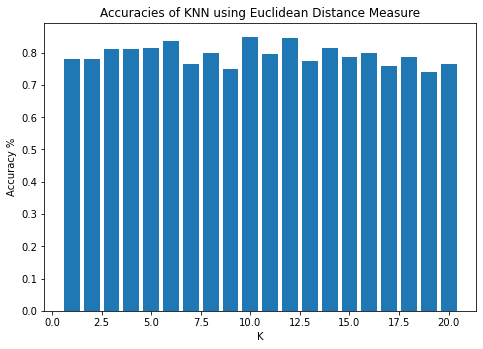

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
k_values_euc = [i for i in range(1, 21)]
ax.bar(k_values_euc, accsEuclidean)
ax.set_title('Accuracies of KNN using Euclidean Distance Measure')
ax.set_xlabel('K')
ax.set_ylabel('Accuracy %')
plt.show()

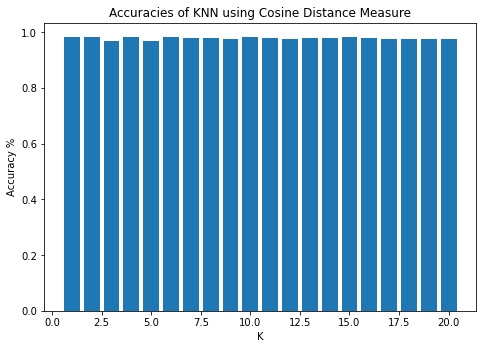

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
k_values_cosine = [i for i in range(1, 21)]
ax.bar(k_values_cosine, accsCosine)
ax.set_title('Accuracies of KNN using Cosine Distance Measure')
ax.set_xlabel('K')
ax.set_ylabel('Accuracy %')
plt.show()

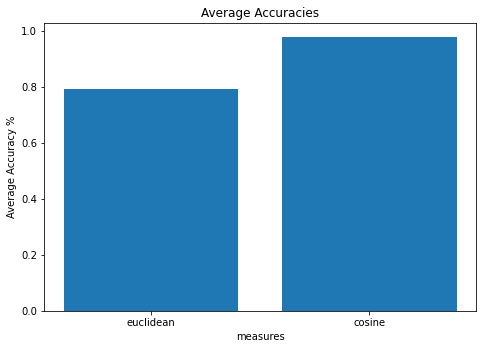

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
averages = [np.average(np.array(accsEuclidean)), np.average(np.array(accsCosine))]
measures = ["euclidean", "cosine"]
ax.bar(measures, averages)
ax.set_title('Average Accuracies')
ax.set_xlabel('measures')
ax.set_ylabel('Average Accuracy %')
plt.show()

In [131]:
print(np.unique(training_classes))

[0 1]


5500

## <h5> 4. Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on text categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights. </h5>

In [13]:
#fill matrices with each instance = number of documents in that set
TFtraining = np.ones(np.shape(training_matrix), dtype=float)* len(training_matrix)
TFtest = np.ones(np.shape(test_matrix), dtype=float)*len(test_matrix)
TFtraining = TFtraining.T
TFtest = TFtest.T

TDtrain = training_matrix.T
TDtest = test_matrix.T

#finding doc counts for each term in test and training matrices
DF_sums_training = pd.DataFrame([(TDtrain!=0).sum(1)]).T
DF_sums_test = pd.DataFrame([(TDtest!=0).sum(1)]).T

print(DF_sums_test)
# Convert each entry into IDF values for both matrices
IDF_training = np.log2(np.divide(TFtraining, np.array(DF_sums_training)))

#test matrix has some 0s as values, use seterr
np.seterr(divide='ignore', invalid='ignore')
IDF_test = np.log2(np.divide(TFtest, np.array(DF_sums_test)))

# compute TFxIDF values for both matrices
TFIDFtraining = training_matrix.T * IDF_training
TFIDFtest = test_matrix.T * IDF_test


        0
0      15
1       0
2       1
3     200
4      26
...   ...
5495    1
5496    3
5497    1
5498    1
5499    1

[5500 rows x 1 columns]


In [14]:
df = pd.DataFrame(TFIDFtest)
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,3.736966,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5.886833,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# run the KNN search with the new values

accsEuclideanTFIDF = []
accsCosineTFIDF = []
for i in range(1, 21):
    accsEuclideanTFIDF.append(computeClassificationAccuracy(TFIDFtest.T, TFIDFtraining.T, training_classes, test_classes, i, 0))
    accsCosineTFIDF.append(computeClassificationAccuracy(TFIDFtest.T, TFIDFtraining.T, training_classes, test_classes, i, 1))

In [123]:
print(accsEuclideanTFIDF)
print(accsCosineTFIDF)

[0.495, 0.495, 0.505, 0.495, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505]
[0.495, 0.495, 0.505, 0.495, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505, 0.505]


## <h5> 5. Create a new classifier based on the Rocchio Method adapted for text categorization [See class notes on text categorization]. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier. </h5>

In [16]:
def cosSim(instance, prototypeVec):
    proto_norm = np.linalg.norm(prototypeVec)
    instance_norm = np.linalg.norm(instance)
    sims = np.dot(prototypeVec, instance) / (proto_norm * instance_norm)
    #getting each distance measure
    return sims


def trainingRocchio(matrix, labels):
    numLabels = np.unique(labels)
    prototypeList = {}
    for i in range(0, len(numLabels)):
        prototypeVec = np.array([0 for i in range(0, matrix.shape[1])])
        for j in range(0, len(matrix)):
            d = matrix[j, :]
            if labels[j] == numLabels[i]:
                prototypeVec = prototypeVec + d
        prototypeList[numLabels[i]] = prototypeVec
    return prototypeList

def classifyRocchio(instance, prototypes):
    m = -2
    returnClass = None
    simValues = []
    for label, prototype in prototypes.items():
        s = cosSim(instance, prototype)
        simValues.append(s)
        if s > m:
            m = s
            returnClass = label
    return returnClass, simValues          

In [18]:
prototype_vectors = trainingRocchio(TFIDFtraining.T, training_classes)

In [20]:
label, simValues = classifyRocchio(test_matrix[0], prototype_vectors)
print(label, simValues)

1 [0.09900688220161394, 0.35084747805999095]


In [21]:
def computeClassificationAccuracyRocchio(testMatrix, testClasses, prototypeVecs):
    numVectors = len(testMatrix)
    correctPredictions = 0
    for i in range(numVectors):
        label, sims = classifyRocchio(testMatrix[i, :], prototypeVecs)
        if label == testClasses[i]:
            correctPredictions += 1
    return correctPredictions/numVectors

In [23]:
pred = computeClassificationAccuracyRocchio(test_matrix, test_classes, prototype_vectors)
print(pred)

0.98


## <h5> The rocchio classification is about as accurate as the KNN using Cosine similarity, according to the above findings. There are instances of the KNN using cosine similiarity where it is even more accurate- this occurs at K = 1, 2, K where KNN is higher- .985 using cosine similiarity and a K of 1,2,4,6,10, 15. </h5>